In [1]:
import pandas as pd
df = pd.read_csv('./30_Training Dataset_V2/training_data.csv')
df.head(10)

,ID,縣市,鄉鎮市區,路名,土地面積,使用分區,移轉層次,總樓層數,主要用途,主要建材,...,建物面積,車位面積,車位個數,橫坐標,縱坐標,備註,主建物面積,陽台面積,附屬建物面積,單價
0,TR-1,台北市,大安區,敦化南路二段,-0.256716,NaN,11,11,住家用,鋼筋混凝土造,...,-0.174154,-0.819326,0.0,305266,2768378,NaN,0.393926,0.183700,-0.438452,4.627714
1,TR-2,台北市,萬華區,水源路,0.100134,NaN,7,12,住家用,鋼筋混凝土造,...,0.314204,-0.819326,0.0,300677,2767990,NaN,-0.316131,0.608577,-0.438452,1.887258
2,TR-3,高雄市,鳳山區,北忠街,0.181921,NaN,10,15,集合住宅,其他,...,0.423366,0.161624,1.0,184815,2504666,NaN,-0.098871,-0.360620,1.525881,1.489072
3,TR-4,新北市,新莊區,福前街,0.085594,NaN,9,14,集合住宅,鋼筋混凝土造,...,0.164249,0.524653,1.0,296653,2772355,NaN,-0.071147,0.315088,0.231984,2.051217
4,TR-5,新北市,板橋區,文化路一段,-0.938116,NaN,41,43,住家用,鋼骨造,...,0.985839,0.532377,1.0,297377,2768472,NaN,0.791954,1.719400,-0.438452,3.269198
5,TR-6,台北市,萬華區,國興路,0.260510,NaN,2,12,住家用,鋼筋混凝土造,...,-0.411438,-0.819326,0.0,301365,2768583,NaN,-0.371295,-0.618277,-0.438452,2.238599
6,TR-7,新北市,樹林區,信義街,0.856422,NaN,2,4,住家用,鋼筋混凝土造,...,-0.868770,-0.819326,0.0,292687,2763850,NaN,-0.245408,-1.642077,-0.438452,1.348536
7,TR-8,桃園市,平鎮區,中庸路,-0.618421,NaN,7,13,住家用,鋼筋混凝土造,...,-0.468317,-0.819326,0.0,271007,2756216,NaN,-0.445130,-0.341851,-0.190775,1.208000
8,TR-9,新北市,永和區,民樂街,0.736159,NaN,5,5,住家用,鋼筋混凝土造,...,-0.422929,-0.819326,0.0,303269,2765580,NaN,-0.109338,1.913922,-0.438452,2.074640
9,TR-10,桃園市,中壢區,龍仁路,-0.326509,NaN,15,15,集合住宅,鋼筋混凝土造,...,-0.518302,1.114768,1.0,273749,2758835,NaN,-0.777810,-0.503952,-0.163018,1.254845


In [2]:
df.columns

Index(['ID', '縣市', '鄉鎮市區', '路名', '土地面積', '使用分區', '移轉層次', '總樓層數', '主要用途',
       '主要建材', '建物型態', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '備註',
       '主建物面積', '陽台面積', '附屬建物面積', '單價'],
      dtype='object')

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# 讀取資料
data = pd.read_csv("./30_Training Dataset_V2/training_data.csv", encoding="utf-8")

# 特徵擷取
# 可以選擇使用一些數值特徵、類別特徵或進行特殊處理

# 將類別特徵進行編碼
label_encoder = LabelEncoder()
data['縣市'] = label_encoder.fit_transform(data['縣市'])
data['鄉鎮市區'] = label_encoder.fit_transform(data['鄉鎮市區'])
data['路名'] = label_encoder.fit_transform(data['路名'])
data['使用分區'] = label_encoder.fit_transform(data['使用分區'])
data['主要用途'] = label_encoder.fit_transform(data['主要用途'])
data['主要建材'] = label_encoder.fit_transform(data['主要建材'])
data['建物型態'] = label_encoder.fit_transform(data['建物型態'])

# 處理日期相關的特徵
# 例如，可以從屋齡提取年份特徵
data['建造年份'] = pd.to_datetime(data['屋齡'], format='%Y').dt.year
data.drop(['屋齡'], axis=1, inplace=True)

# 設定特徵和目標變數
features = ['土地面積', '總樓層數', '建造年份', '建物面積', '車位個數', '橫坐標', '縱坐標']  # 請根據實際情況選擇特徵
target = '單價'

# 切分訓練集和驗證集
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# 從訓練集中提取特徵和目標
X_train = train_data[features]
y_train = train_data[target]

# 從驗證集中提取特徵和目標
X_val = val_data[features]
y_val = val_data[target]

# 使用隨機森林模型進行訓練
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 進行預測
predictions = model.predict(X_val)

# 計算MAE（Mean Absolute Error）
mae = mean_absolute_error(y_val, predictions)
print(f'MAE: {mae:.2f}')

# 現在，您可以使用模型進行測試集的預測，並生成提交文件。
# 提醒：在提交之前，可能需要對測試集進行相同的特徵工程。

ValueError: time data "32" doesn't match format "%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [2]:
df.columns

Index(['ID', '縣市', '鄉鎮市區', '路名', '土地面積', '使用分區', '移轉層次', '總樓層數', '主要用途',
       '主要建材', '建物型態', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '備註',
       '主建物面積', '陽台面積', '附屬建物面積', '單價'],
      dtype='object')

In [3]:
#使用分區、備註 差太多
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      11751 non-null  object 
 1   縣市      11751 non-null  object 
 2   鄉鎮市區    11751 non-null  object 
 3   路名      11751 non-null  object 
 4   土地面積    11751 non-null  float64
 5   使用分區    595 non-null    object 
 6   移轉層次    11751 non-null  int64  
 7   總樓層數    11751 non-null  int64  
 8   主要用途    11751 non-null  object 
 9   主要建材    11751 non-null  object 
 10  建物型態    11751 non-null  object 
 11  屋齡      11751 non-null  float64
 12  建物面積    11751 non-null  float64
 13  車位面積    11751 non-null  float64
 14  車位個數    11751 non-null  float64
 15  橫坐標     11751 non-null  int64  
 16  縱坐標     11751 non-null  int64  
 17  備註      92 non-null     object 
 18  主建物面積   11751 non-null  float64
 19  陽台面積    11751 non-null  float64
 20  附屬建物面積  11751 non-null  float64
 21  單價      11751 non-null  float64
dty

In [72]:
df = df.rename(columns = {'縣市':'county'})
df = df.rename(columns = {'鄉鎮市區':'town'})
df = df.rename(columns = {'路名':'road'})
df = df.rename(columns = {'主要用途':'purpose'})
df = df.rename(columns = {'主要建材':'material'})

dfcounty = pd.get_dummies(df.county)
#dftown = pd.get_dummies(df.town)
#dfroad = pd.get_dummies(df.road)
#dfpurpose = pd.get_dummies(df.purpose)
#dfmaterial = pd.get_dummies(df.material)
#dfID = pd.get_dummies(df.ID)

In [73]:
df = df.drop(['備註', '使用分區', 'county', 'town', 'road', '建物型態', 'purpose', 'material', 'ID'], axis = 1)

#concatenate
#df_total = pd.concat([df, dfcounty, dftown, dfroad, dfpurpose, dfmaterial, dfID],axis=1)
df_total = pd.concat([df, dfcounty],axis=1)

In [74]:
df.columns

Index(['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標',
       '主建物面積', '陽台面積', '附屬建物面積', '單價'],
      dtype='object')

In [75]:
df_total.head(10)

,土地面積,移轉層次,總樓層數,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,...,彰化縣,新北市,新竹市,新竹縣,桃園市,花蓮縣,苗栗縣,金門縣,雲林縣,高雄市
0,-0.256716,11,11,32.583333,-0.174154,-0.819326,0.0,305266,2768378,0.393926,...,False,False,False,False,False,False,False,False,False,False
1,0.100134,7,12,24.166667,0.314204,-0.819326,0.0,300677,2767990,-0.316131,...,False,False,False,False,False,False,False,False,False,False
2,0.181921,10,15,6.166667,0.423366,0.161624,1.0,184815,2504666,-0.098871,...,False,False,False,False,False,False,False,False,False,True
3,0.085594,9,14,8.833333,0.164249,0.524653,1.0,296653,2772355,-0.071147,...,False,True,False,False,False,False,False,False,False,False
4,-0.938116,41,43,11.000000,0.985839,0.532377,1.0,297377,2768472,0.791954,...,False,True,False,False,False,False,False,False,False,False
5,0.260510,2,12,39.333333,-0.411438,-0.819326,0.0,301365,2768583,-0.371295,...,False,False,False,False,False,False,False,False,False,False
6,0.856422,2,4,46.000000,-0.868770,-0.819326,0.0,292687,2763850,-0.245408,...,False,True,False,False,False,False,False,False,False,False
7,-0.618421,7,13,17.000000,-0.468317,-0.819326,0.0,271007,2756216,-0.445130,...,False,False,False,False,True,False,False,False,False,False
8,0.736159,5,5,42.833333,-0.422929,-0.819326,0.0,303269,2765580,-0.109338,...,False,True,False,False,False,False,False,False,False,False
9,-0.326509,15,15,6.333333,-0.518302,1.114768,1.0,273749,2758835,-0.777810,...,False,False,False,False,True,False,False,False,False,False


In [76]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   土地面積    11751 non-null  float64
 1   移轉層次    11751 non-null  int64  
 2   總樓層數    11751 non-null  int64  
 3   屋齡      11751 non-null  float64
 4   建物面積    11751 non-null  float64
 5   車位面積    11751 non-null  float64
 6   車位個數    11751 non-null  float64
 7   橫坐標     11751 non-null  int64  
 8   縱坐標     11751 non-null  int64  
 9   主建物面積   11751 non-null  float64
 10  陽台面積    11751 non-null  float64
 11  附屬建物面積  11751 non-null  float64
 12  單價      11751 non-null  float64
 13  台中市     11751 non-null  bool   
 14  台北市     11751 non-null  bool   
 15  台南市     11751 non-null  bool   
 16  嘉義市     11751 non-null  bool   
 17  嘉義縣     11751 non-null  bool   
 18  基隆市     11751 non-null  bool   
 19  宜蘭縣     11751 non-null  bool   
 20  屏東縣     11751 non-null  bool   
 21  彰化縣     11751 non-null  bool   
 22

In [ ]:
result = df[0].astype(int)

c:\Users\Jenny\anaconda3\envs\HousePrice\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 22303 (\N{CJK UNIFIED IDEOGRAPH-571F}) missing from current font.
  fig.canvas.draw()
c:\Users\Jenny\anaconda3\envs\HousePrice\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  fig.canvas.draw()
c:\Users\Jenny\anaconda3\envs\HousePrice\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  fig.canvas.draw()
c:\Users\Jenny\anaconda3\envs\HousePrice\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  fig.canvas.draw()
c:\Users\Jenny\anaconda3\envs\HousePrice\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from current font.
  fig.canvas.draw()
c:\Users\Jenny\anaconda3\envs\HousePrice\lib\site-packages\seaborn\utils.py

<Axes: >

c:\Users\Jenny\anaconda3\envs\HousePrice\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 22303 (\N{CJK UNIFIED IDEOGRAPH-571F}) missing from current font.
  func(*args, **kwargs)
c:\Users\Jenny\anaconda3\envs\HousePrice\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  func(*args, **kwargs)
c:\Users\Jenny\anaconda3\envs\HousePrice\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  func(*args, **kwargs)
c:\Users\Jenny\anaconda3\envs\HousePrice\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  func(*args, **kwargs)
c:\Users\Jenny\anaconda3\envs\HousePrice\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from current font.
  func(*args, **kwargs)
c:\Users\Jenny\anaconda3\

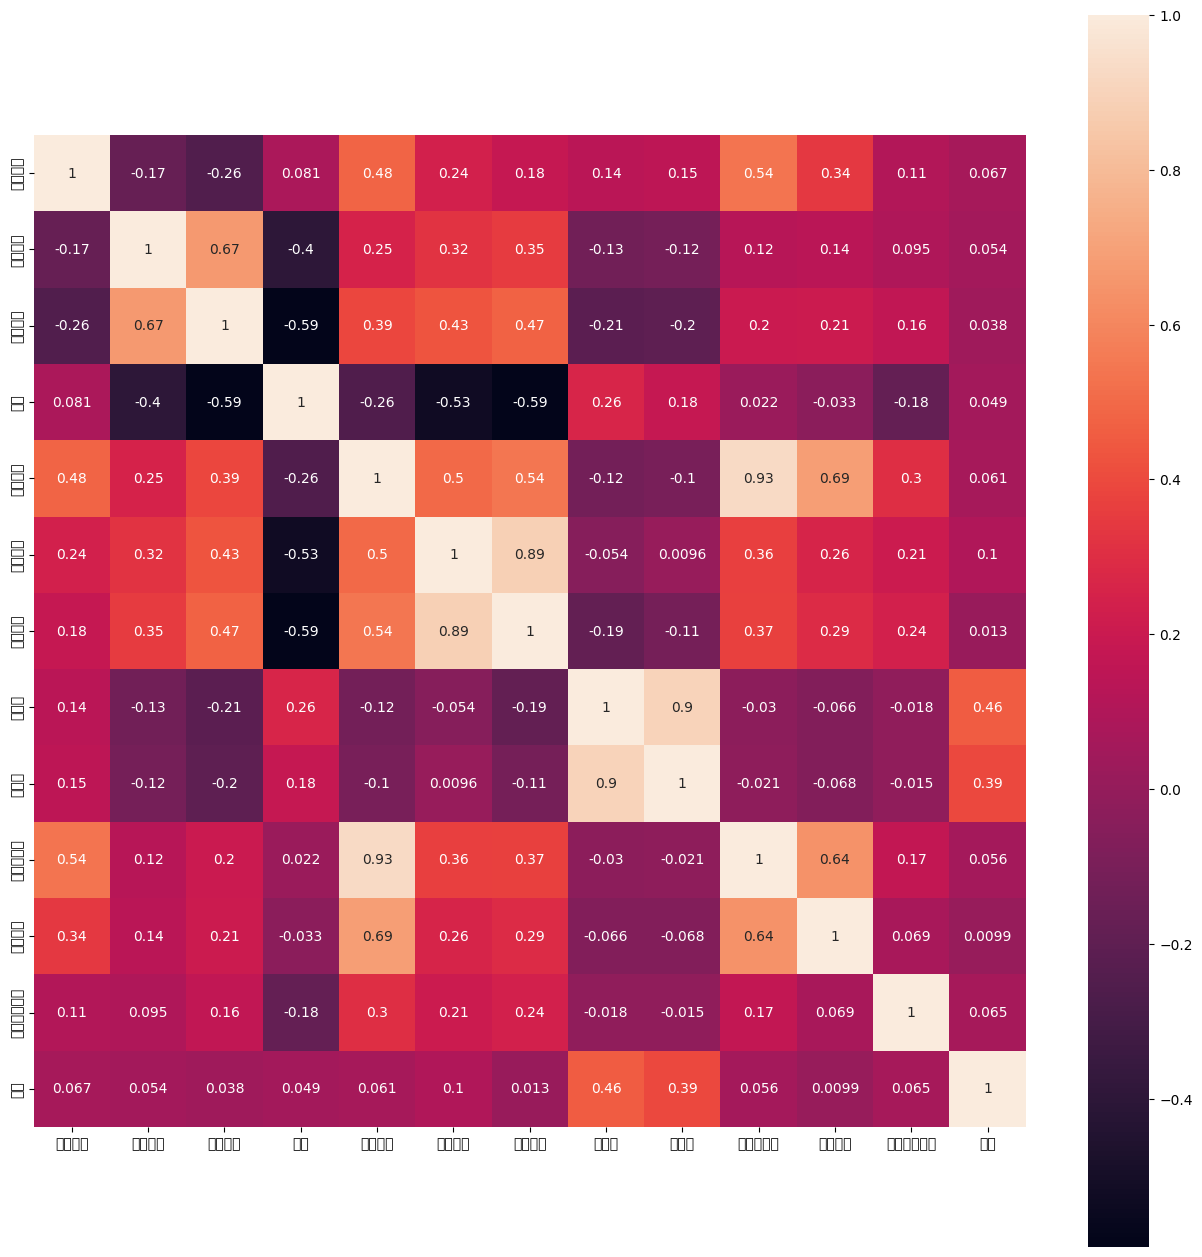

In [78]:
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_context({"figure.figsize":(16,16)})
sns.heatmap(df.corr(), square = True, linecolor = 'white', annot = True)

In [3]:
temp = pd.read_csv('C:/Users/Jenny/Desktop/house price prediction/30_Public Dataset_Public Sumission Template_v2/public_dataset.csv')
temp.head(10)

,ID,縣市,鄉鎮市區,路名,土地面積,使用分區,移轉層次,總樓層數,主要用途,主要建材,...,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,備註,主建物面積,陽台面積,附屬建物面積
0,PU-1,新北市,樹林區,大有路,2.039378,NaN,3,7,住家用,鋼筋混凝土造,...,13.916667,0.472202,0.146176,1.0,288745,2760266,NaN,0.849664,0.146161,-0.438452
1,PU-2,新北市,三重區,力行路一段,-0.077786,NaN,5,5,住家用,鋼筋混凝土造,...,40.833333,-0.546455,-0.819326,0.0,298751,2773492,NaN,-0.004102,0.064257,-0.438452
2,PU-3,新北市,板橋區,民生路三段,-0.555766,NaN,2,20,集合住宅,鋼筋混凝土造,...,1.333333,0.124032,-0.167419,1.0,297000,2769106,NaN,-0.285862,-0.775260,1.323042
3,PU-4,新北市,泰山區,明志路二段,-0.744838,NaN,6,16,住家用,鋼筋混凝土造,...,27.500000,-0.027072,0.115280,1.0,293076,2771160,NaN,0.027582,0.316794,-0.139532
4,PU-5,台北市,信義區,忠孝東路五段,-0.610923,NaN,3,7,住家用,鋼筋混凝土造,...,40.500000,-0.863600,-0.819326,0.0,308103,2770220,NaN,-0.883328,-0.560262,-0.075477
5,PU-6,新北市,三重區,溪尾街,0.549057,NaN,5,5,住家用,鋼筋混凝土造,...,35.000000,-0.393627,-0.819326,0.0,299276,2775194,NaN,0.264362,-0.056893,-0.438452
6,PU-7,新北市,泰山區,明志路二段,-0.695953,NaN,8,14,集合住宅,鋼筋混凝土造,...,3.750000,-0.511982,0.799628,1.0,293078,2771217,NaN,-0.750086,-0.874227,0.368633
7,PU-8,新北市,泰山區,仁義路,-0.780720,NaN,3,13,住家用,鋼筋混凝土造,...,17.750000,-0.114402,0.314560,1.0,293716,2771834,NaN,-0.194205,-0.212169,0.152983
8,PU-9,桃園市,蘆竹區,中山路,-0.227275,NaN,14,14,住家用,鋼筋混凝土造,...,22.750000,1.224272,0.838248,1.0,280095,2772017,NaN,1.632424,0.966907,-0.301803
9,PU-10,新北市,新莊區,幸福路,0.219846,NaN,4,5,住家用,鋼筋混凝土造,...,41.333333,-0.630912,-0.819326,0.0,295761,2771317,NaN,0.000141,-0.788910,-0.438452


In [4]:
temp = pd.read_csv('C:/Users/Jenny/Desktop/house price prediction/30_Public Dataset_Public Sumission Template_v2/public_submission_template.csv')
temp.head(10)

,ID,predicted_price
0,PU-1,0.0
1,PU-2,0.0
2,PU-3,0.0
3,PU-4,0.0
4,PU-5,0.0
5,PU-6,0.0
6,PU-7,0.0
7,PU-8,0.0
8,PU-9,0.0
9,PU-10,0.0


In [11]:
#load external data
"""ATM資料、大學基本資料、公車站點資料、火車站點資料、金融機構基本資料、便利商店、高中基本資料、國小基本資料、國中基本資料、
捷運站點資料、郵局據點資料、腳踏車站點資料、醫療機構基本資料"""

import pandas as pd
dfexternal = pd.read_csv('./30_Training Dataset_V2/external_data/捷運站點資料.csv')
dfexternal.head(10)

,站點UID,站點ID,站點名稱,站點地址,假日自行車進出與否,lat,lng
0,TRTC-R23,R23,復興崗,112054臺北市北投區中央北路3段53巷10號,True,25.137497,121.485456
1,TRTC-R24,R24,忠義,112017臺北市北投區中央北路4段301號,True,25.130923,121.473298
2,TRTC-R25,R25,關渡,112021臺北市北投區大度路3段296巷51號,True,25.125510,121.467000
3,TRTC-R26,R26,竹圍,251033新北市淡水區民權路50號,True,25.136900,121.459550
4,TRTC-R27,R27,紅樹林,251033新北市淡水區中正東路2段68號,True,25.153990,121.458800
5,TRTC-R28,R28,淡水,251018新北市淡水區中正路1號,False,25.167745,121.445805
6,TRTC-R22A,R22A,新北投,112028臺北市北投區大業路700號,True,25.136931,121.502595
7,TRTC-Y07,Y07,大坪林,23143新北市新店區北新路3段190號,False,24.982720,121.541340
8,TRTC-Y08,Y08,十四張,23141新北市新店區民權路282號,False,24.984333,121.527698
9,TRTC-Y09,Y09,秀朗橋,23582新北市中和區景平路2號,False,24.990549,121.525051


In [ ]:
df1 = pd.read_csv('./30_Training Dataset_V2/external_data/ATM資料.csv')
df2 = pd.read_csv('./30_Training Dataset_V2/external_data/大學基本資料.csv')
df3 = pd.read_csv('./30_Training Dataset_V2/external_data/公車站點資料.csv')
df4 = pd.read_csv('./30_Training Dataset_V2/external_data/火車站點資料.csv')
df5 = pd.read_csv('./30_Training Dataset_V2/external_data/金融機構基本資料.csv')
df6 = pd.read_csv('./30_Training Dataset_V2/external_data/便利商店.csv')
df7 = pd.read_csv('./30_Training Dataset_V2/external_data/高中基本資料.csv')
df8 = pd.read_csv('./30_Training Dataset_V2/external_data/國小基本資料.csv')
df13 = pd.read_csv('./30_Training Dataset_V2/external_data/國中基本資料.csv')
df9 = pd.read_csv('./30_Training Dataset_V2/external_data/捷運站點資料.csv')
df10 = pd.read_csv('./30_Training Dataset_V2/external_data/郵局據點資料.csv')
df11 = pd.read_csv('./30_Training Dataset_V2/external_data/腳踏車站點資料.csv')
df12 = pd.read_csv('./30_Training Dataset_V2/external_data/醫療機構基本資料.csv')